In [1]:
import pandas as pd
import numpy as np
import os, pickle, sys

## ***transaction dataset***

### Load data
  * 원래 data는 약 3기가 정도로, 현재 불러오는 데이터는 약 1/3에 해당함

In [2]:
transaction = pickle.load(open('../tut_data/transaction_small.pkl', 'rb')) # 1.02 -> 4.93(max): 3.9G
transaction.head(10)

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,prev_transaction_date,transaction_cycle,transaction_cycle_delta,tran_cycle_str
16304964,VE1tjs+PbN9YFBGcUHu9GIw7HsZgdJXvVSII/EaqcFE=,41,30,149,149,1,2015-08-31,20151001,0,NaT,NaT,NaN,nan
15423434,g+LNBMS8Qvfr3Er0mylRvCrlt7arkaz7/pGMlICFioA=,30,30,100,100,1,2017-01-10,20170209,0,2016-11-10,61 days,61.0,61.0
3744418,WIts3tLZ4oTZ/DSdm//+9BgCVYdKY1vrGVldeVs3yU0=,41,30,99,99,1,2016-02-15,20160314,0,NaT,NaT,NaN,nan
14097938,skBYTFMfc9fvCno8qktUWdnJtER7rJYB8mx5uqFMJIo=,39,30,149,149,1,2017-01-31,20170316,0,2016-08-31,153 days,153.0,153.0
15786025,UZ4E0NWA9u+0edUGr1qzkToagst98U6pv+tC4VFx5lk=,41,30,99,99,1,2016-06-03,20160704,0,2016-04-03,61 days,61.0,61.0
20754428,B+qLWkE1NGj1yDEbRZS3ByDQweOShVBK8TuR03PRm9s=,41,30,149,149,1,2016-07-22,20160822,0,2015-10-22,274 days,274.0,274.0
6838472,gUeiME15R/bY+Kcjv1OohBFtJqFuGYToLqDaViGna6Q=,39,30,149,149,1,2015-11-02,20151221,0,NaT,NaT,NaN,nan
2959612,06iF9aQ7NbHRVAfe1rcihlryJocIY+fLadDzbVY9ty4=,41,30,99,99,1,2016-02-27,20160327,0,NaT,NaT,NaN,nan
10133805,cpLAbGY4IZsNiDI+7GNSwfrdbMvaETcR6/IfLD9iPak=,41,0,0,119,1,2015-05-07,20150608,0,2015-03-07,61 days,61.0,61.0
20546739,JDp6LyuPhyVuw0/XiX1zBsTXnUX/YHSFp2rysYXCZ88=,41,30,149,149,1,2015-02-28,20150401,0,NaT,NaT,NaN,nan


- 데이터 크기 확인

In [4]:
print('transaction size = %.2f GB'%(sys.getsizeof(transaction)/1024/1024/1024))

transaction size = 1.03 GB


### transaction data의 key가 unique한지 판단
* 결국 고객단위의 모형을 만들 것이므로 고객단위로 unique한지 판단

In [5]:
a = transaction.shape
b = transaction.groupby(['msno']).count().shape
# a = len(transaction)
# b = len(transaction['msno'].unique())
try:
    assert a[0] == b[0]
    print('key unique')
except Exception as e:
    print('Key not unique...')

Key not unique...


### unique한 user 숫자

In [6]:
# reset_index(inplace = True)는 return값이 없음
# Pandasa column을 고를 때에는 list의 list를 전달함. list만 전달하면, series를 얻음. indexing할 때에는 series를 이용
tmp = pd.DataFrame(transaction.groupby(['msno'])\
                   .count()\
                   .reset_index()[['msno', 'payment_method_id']])\
                    .rename(columns = {'payment_method_id': 'count'})
# 총 건수 확인: 2,363,626
tmp.shape

(1383684, 2)

Unique `msno` $\Rightarrow$ 1,383,684

In [7]:
tmp.head()

,msno,count
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,5
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,8
3,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,2
4,++/TR7WI15q2ZCtOXmoap7jR+kEhbMVE5swOqsfqpqI=,2


### 개별건 확인

In [8]:
transaction[transaction['msno'] == '+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=']

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,prev_transaction_date,transaction_cycle,transaction_cycle_delta,tran_cycle_str
58566,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-01-15,20170215,0,NaT,NaT,NaN,nan


### 10번 이상 결제한 고객의 숫자

In [9]:
tmp[tmp['count'] > 10]['msno'].shape

(854,)

* 10번 이상 결제한 고객의 숫자 $\Rightarrow$ 854

In [10]:
# 최소 날짜와 최대 날짜로 데이터 기간 파악 하기
print('min dt {}, max dt {}'.format(np.min(transaction[['transaction_date']]), np.max(transaction[['transaction_date']])))

min dt transaction_date   2015-01-01
dtype: datetime64[ns], max dt transaction_date   2017-02-28
dtype: datetime64[ns]


* $\Rightarrow$  2015. 01. 01 ~ 2017.02.28

### 갱신 주기 파악

 * description에서는 30일 membership이 고객의 majority라고 이야기 하고 있음
 * 실제 거래 주기를 바탕으로 갱신 주기 현황을 파악하고 싶음 (날짜 연산 방법)

#### Easiest way

In [12]:
transaction[['msno', 'payment_plan_days']] \
.groupby(['msno', 'payment_plan_days']) \
.count() \
.reset_index() \
.groupby(['payment_plan_days']) \
.count() \
.reset_index() \
.rename(columns = {'msno': 'count'}).head(20)

,payment_plan_days,count
0,0,121218
1,1,729
2,10,5540
3,100,3743
4,110,31
5,120,1685
6,14,1091
7,15,2
8,180,7800
9,195,17087


In [13]:
from bokeh.io import show, output_file, output_notebook
from bokeh.models import ColumnDataSource, DataRange1d
from bokeh.palettes import Spectral5, Oranges9, Viridis256
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
output_notebook()

Loading BokehJS ...

In [14]:
transaction.payment_plan_days = transaction.payment_plan_days.astype(int, errors = 'ignore')
tmp = transaction[['msno', 'payment_plan_days']] \
.groupby(['msno', 'payment_plan_days']) \
.count() \
.reset_index() \
.groupby(['payment_plan_days'])
source = ColumnDataSource(tmp)

In [15]:
xdr = DataRange1d(start=10, end=60)
p = figure(plot_width = 1000, x_range=xdr)

p.vbar(x='payment_plan_days', top='msno_count', width=1, line_color="white", source=source)

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "payment plan"
p.yaxis.axis_label = "Count"
p.y_range.start = 0

show(p)

# ** 실습**

### 실제 Payment 주기를 통해 파악

* 날짜에 관한 처리를 해야 함

#### Sort values

In [16]:
#https://stackoverflow.com/questions/17141558/how-to-sort-a-dataframe-in-python-pandas-by-two-or-more-columns
transaction.sort_values(['msno', 'transaction_date'], ascending=[True, True], inplace = True)
transaction.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,prev_transaction_date,transaction_cycle,transaction_cycle_delta,tran_cycle_str
58566,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-01-15,20170215,0,NaT,NaT,NaN,nan
14494860,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,2015-02-28,20150419,0,NaT,NaT,NaN,nan
5446936,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-07-31,20150919,0,2015-05-31,61 days,61.0,61.0
5062072,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-12-02,20160119,0,2015-07-31,124 days,124.0,124.0
7048805,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2016-09-30,20161119,0,2016-01-31,243 days,243.0,243.0


#### lag the variable

In [17]:
#https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
transaction['prev_transaction_date'] = transaction.groupby(['msno'])['transaction_date'].shift(1)

In [18]:
transaction.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,prev_transaction_date,transaction_cycle,transaction_cycle_delta,tran_cycle_str
58566,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-01-15,20170215,0,NaT,NaT,NaN,nan
14494860,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,2015-02-28,20150419,0,NaT,NaT,NaN,nan
5446936,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-07-31,20150919,0,2015-02-28,61 days,61.0,61.0
5062072,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-12-02,20160119,0,2015-07-31,124 days,124.0,124.0
7048805,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2016-09-30,20161119,0,2015-12-02,243 days,243.0,243.0


#### Check data type

In [19]:
# https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type
transaction.dtypes

msno                                object
payment_method_id                    int64
payment_plan_days                    int64
plan_list_price                      int64
actual_amount_paid                   int64
is_auto_renew                        int64
transaction_date            datetime64[ns]
membership_expire_date               int64
is_cancel                            int64
prev_transaction_date       datetime64[ns]
transaction_cycle          timedelta64[ns]
transaction_cycle_delta            float64
tran_cycle_str                      object
dtype: object

#### Change data type from int to date

In [20]:
# Date의 경우는 날짜로 전환해주어야 계산이 용이함
# https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
transaction['prev_transaction_date'] =  pd.to_datetime(transaction['prev_transaction_date'], format='%Y%m%d')
transaction['transaction_date'] =  pd.to_datetime(transaction['transaction_date'], format='%Y%m%d')

In [21]:
transaction.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,prev_transaction_date,transaction_cycle,transaction_cycle_delta,tran_cycle_str
58566,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-01-15,20170215,0,NaT,NaT,NaN,nan
14494860,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,2015-02-28,20150419,0,NaT,NaT,NaN,nan
5446936,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-07-31,20150919,0,2015-02-28,61 days,61.0,61.0
5062072,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-12-02,20160119,0,2015-07-31,124 days,124.0,124.0
7048805,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2016-09-30,20161119,0,2015-12-02,243 days,243.0,243.0


In [22]:
transaction.dtypes

msno                                object
payment_method_id                    int64
payment_plan_days                    int64
plan_list_price                      int64
actual_amount_paid                   int64
is_auto_renew                        int64
transaction_date            datetime64[ns]
membership_expire_date               int64
is_cancel                            int64
prev_transaction_date       datetime64[ns]
transaction_cycle          timedelta64[ns]
transaction_cycle_delta            float64
tran_cycle_str                      object
dtype: object

In [23]:
# Date difference: transaction_date - prev_transaction_date
# Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
transaction['transaction_cycle'] = transaction.transaction_date - transaction.prev_transaction_date

$\Rightarrow$ 여전히 transaction_cycle은 date type (timedelta64)

In [24]:
transaction.dtypes

msno                                object
payment_method_id                    int64
payment_plan_days                    int64
plan_list_price                      int64
actual_amount_paid                   int64
is_auto_renew                        int64
transaction_date            datetime64[ns]
membership_expire_date               int64
is_cancel                            int64
prev_transaction_date       datetime64[ns]
transaction_cycle          timedelta64[ns]
transaction_cycle_delta            float64
tran_cycle_str                      object
dtype: object

In [25]:
# https://schanjr.wordpress.com/2016/04/10/finding-out-all-of-your-nan-and-nat-rows-in-your-data-frame-at-once/
# NaN: Not A Time, NaT: Not a Time
transaction.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,prev_transaction_date,transaction_cycle,transaction_cycle_delta,tran_cycle_str
58566,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-01-15,20170215,0,NaT,NaT,NaN,nan
14494860,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,2015-02-28,20150419,0,NaT,NaT,NaN,nan
5446936,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-07-31,20150919,0,2015-02-28,153 days,61.0,61.0
5062072,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-12-02,20160119,0,2015-07-31,124 days,124.0,124.0
7048805,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2016-09-30,20161119,0,2015-12-02,303 days,243.0,243.0


In [26]:
trans_cycle_summary = transaction.groupby(['transaction_cycle']).count()[['msno']]

In [27]:
trans_cycle_summary.rename(columns = {'msno': 'count'}).reset_index().head()

,transaction_cycle,count
0,0 days,9209
1,1 days,3257
2,2 days,1792
3,3 days,1436
4,4 days,1342


In [28]:
# 779가지의 transaction 주기를 지님
# 한사람이 여러개의 주기를 지닐 수도 있고 해서, 이 주기를 평균으로 대표
trans_cycle_summary.shape

(784, 1)

In [29]:
trans_cycle_summary.reset_index().dtypes

transaction_cycle    timedelta64[ns]
msno                           int64
dtype: object

#### Plot transaction cycle
  * 먼저 time.delta type을 numeric (float64)으로 바꾼후 이를 다시 string으로 변환하는 작업이 필요함

In [30]:
# Change date to time delta. To treate date difference as integer
# Take some time
# https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer
import datetime as dt
transaction['transaction_cycle_delta'] = transaction['transaction_cycle'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)

In [31]:
transaction.dtypes

msno                                object
payment_method_id                    int64
payment_plan_days                    int64
plan_list_price                      int64
actual_amount_paid                   int64
is_auto_renew                        int64
transaction_date            datetime64[ns]
membership_expire_date               int64
is_cancel                            int64
prev_transaction_date       datetime64[ns]
transaction_cycle          timedelta64[ns]
transaction_cycle_delta            float64
tran_cycle_str                      object
dtype: object

In [32]:
transaction['tran_cycle_str'] = transaction.transaction_cycle_delta.astype('int', errors = 'ignore')

In [33]:
transaction.dtypes

msno                                object
payment_method_id                    int64
payment_plan_days                    int64
plan_list_price                      int64
actual_amount_paid                   int64
is_auto_renew                        int64
transaction_date            datetime64[ns]
membership_expire_date               int64
is_cancel                            int64
prev_transaction_date       datetime64[ns]
transaction_cycle          timedelta64[ns]
transaction_cycle_delta            float64
tran_cycle_str                     float64
dtype: object

In [34]:
transaction.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,prev_transaction_date,transaction_cycle,transaction_cycle_delta,tran_cycle_str
58566,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,41,30,99,99,1,2017-01-15,20170215,0,NaT,NaT,NaN,NaN
14494860,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,2015-02-28,20150419,0,NaT,NaT,NaN,NaN
5446936,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-07-31,20150919,0,2015-02-28,153 days,153.0,153.0
5062072,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-12-02,20160119,0,2015-07-31,124 days,124.0,124.0
7048805,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2016-09-30,20161119,0,2015-12-02,303 days,303.0,303.0


In [35]:
tmp = transaction.groupby(['tran_cycle_str'])
source = ColumnDataSource(tmp)

In [36]:
xdr = DataRange1d(start=10, end=60)
p = figure(plot_width = 900, x_range = xdr)
p.vbar(x='tran_cycle_str', top='payment_method_id_count', width=1, line_color="white", source=source)
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Transaction cycle"
p.yaxis.axis_label = "Count"
p.y_range.start = 0

show(p)

### Get mean and standard deviation of date

In [37]:
# https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average
mean_trans = transaction[['msno', 'transaction_cycle_delta']].groupby(['msno']).mean()
std_trans = transaction[['msno', 'transaction_cycle_delta']].groupby(['msno']).std()

In [38]:
mean_trans.reset_index().head()

,msno,transaction_cycle_delta
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,NaN
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,168.000000
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,65.142857
3,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,218.000000
4,++/TR7WI15q2ZCtOXmoap7jR+kEhbMVE5swOqsfqpqI=,183.000000


### Seaborn을 이용한 graph

In [39]:
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
import seaborn as sns
tmp = pd.DataFrame(
    mean_trans['transaction_cycle_delta'][mean_trans['transaction_cycle_delta'] < 300]
)
print(tmp.columns)

Index(['transaction_cycle_delta'], dtype='object')


/opt/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


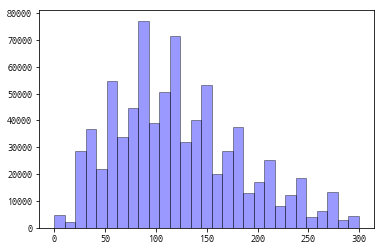

In [40]:
sns.distplot(
    tmp
  , hist = True, kde = False
  , bins = int(tmp.max()/10)
  , color = 'blue', hist_kws = {'edgecolor': 'black'})


### 개별건

In [41]:
transaction[transaction['transaction_cycle_delta'] > 750].shape

(167, 13)

## 분석용 summary data 생성
* 분석에는 customer number를 key로 unique한 데이터를 생성해야 함
* 뒤에 실제 분석 작업에서 추가해야겠지만, 현재는 지금까지 나와 있는 데이터를 바탕으로 summary할 필요가 있음
* payment_method_id와 payment_plan_days, plan_list_price, actual_amount_paid, is_auto_renew는 정보성 data이므로 그대로 가져가돼,
* transaction의 횟수, transaction 주기, transaction entropy를 구해볼까 함

### Unique 여부 파악하기

In [42]:
#assert transaction.groupby(['msno']).count().shape == transaction.groupby(['msno', 'plan_list_price']).count().shape
#assert transaction.groupby(['msno', 'payment_method_id']).count().shape == transaction.groupby(['msno', 'plan_list_price']).count().shape
#assert transaction.groupby(['msno', 'payment_plan_days']).count().shape == transaction.groupby(['msno', 'plan_list_price']).count().shape

In [43]:
print('unique msno = {}'.format(transaction.groupby(['msno']).count().shape))
print('unique msno-plan_list_price = {}'.format(transaction.groupby(['msno', 'plan_list_price']).count().shape))
print('unique msno-payment_plan_days = {}'.format(transaction.groupby(['msno', 'payment_plan_days']).count().shape))
print('unique msno-payment_method_id = {}'.format(transaction.groupby(['msno', 'payment_method_id']).count().shape))
print('unique msno-is_auto_renew = {}'.format(transaction.groupby(['msno', 'is_auto_renew']).count().shape))

unique msno = (1383684, 12)
unique msno-plan_list_price = (1646890, 11)
unique msno-payment_plan_days = (1604326, 11)
unique msno-payment_method_id = (1463918, 11)
unique msno-is_auto_renew = (1423681, 11)


$\Rightarrow$ 고객별로 지불 방법, plan, 실제 결제 대금이 모두 다름

 * 따라서, 지불방법, plan, 결제대금, is_auto를 모두 다른 case로 보고 summary해야함
 * 시간이 많이 걸릴 것으로 예상

---

### transaction_date summary

⭐️

In [44]:
import scipy as sc
# Define the aggregation procedure outside of the groupby operation
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
aggregations = {
    'plan_list_price':['count', 'nunique', lambda x: sc.stats.entropy(x)/len(x)],
    'payment_method_id': ['nunique', lambda x: sc.stats.entropy(x)/len(x)],
    'actual_amount_paid': ['mean','count','nunique', lambda x: sc.stats.entropy(x)/len(x)],
    'is_auto_renew': ['count', 'nunique'],
    'transaction_date': ['first', 'last', 'nunique'],
    'membership_expire_date': ['first', 'last', 'nunique']
}
res = transaction.groupby(['msno']).agg(aggregations)

/opt/venv/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2507: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


### 미처 추가하지 못했던 변수

In [45]:
# Define the aggregation procedure outside of the groupby operation
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
aggregations = {
    'is_cancel':['nunique'],
    'transaction_cycle_delta': ['mean', 'std', 'min', 'max']
}
res_1 = transaction.groupby(['msno']).agg(aggregations)

### Final data

In [46]:
res_2 = pd.merge(res, res_1, on = 'msno') # default는 inner
res_2.fillna(0, inplace = True) # fill na with 0
# rename column
tmp = ["_".join(x) for x in res_2.columns.ravel()]
tmp_1 = [x.replace('<lambda>', 'entropy') for x in tmp]
res_2.columns = tmp_1